In [45]:
#importing libraries such as pandas for dataframes and numpy for math functions 
import numpy as np 
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt

In [47]:
#Loading boston datset from sklearn library
from sklearn.model_selection import train_test_split #library to split test and train dataset
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [48]:
#tranform data set into data frame
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [49]:
#splitting data 70% to 30%
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
print(len(x_train))
print(len(x_test))

print(len(y_train))
print(len(y_test))

#making batches for training set, batches->3
mBatch1 = []
mBatch2 = []
mBatch3 = []

#assigning instances to batches
mCalcl = int(len(x_train)/3)
print(len(x_train)/3)
for b in range(0, len(x_train)):
    if b in range(0, mCalcl):
        mBatch1.append(x_train.iloc[b].to_numpy())
    if b in range(mCalcl, mCalcl*2):
        mBatch2.append(x_train.iloc[b].to_numpy())
    if b in range(mCalcl*2, mCalcl*3):
        mBatch3.append(x_train.iloc[b].to_numpy())
        
        
#making batches for testing set, batches->3       
tmBatch1 = []
tmBatch2 = []
tmBatch3 = []

#assigning instances to batches
tmCalcl = int(len(x_test)/3)
print(len(x_train)/3)
for b in range(0, len(x_test)):
    if b in range(0, tmCalcl):
        tmBatch1.append(x_test.iloc[b].to_numpy())
    if b in range(tmCalcl, tmCalcl*2):
        tmBatch2.append(x_test.iloc[b].to_numpy())
    if b in range(tmCalcl*2, tmCalcl*3):
        tmBatch3.append(x_test.iloc[b].to_numpy())

354
152
354
152
118.0
118.0


In [50]:
#dot production function to multiply weights with inputs and thn add bias
def dotProduct(inputs, weights, bias):
    x = np.dot(inputs, np.array(weights).T) + biases
    return x

In [51]:
#activation function to activate per neuron
def activation(hout):
    for i in range(len(hout)):
        hout[i] = np.maximum(0.0, hout[i])
    return hout

In [52]:
#Error function to calculate error per instance
Error = []
def error(target, foutput):
    global Error
    Error.append(pow(target - foutput,2))
    avg = sum(Error)/len(Error)
    return avg

In [56]:
#back up
x0 = .15
x1 = 0.20
x2 = .21
x3 = .12
x4 = .21
x5 = .15
x6 = 0.20
x7 = .05
x8 = .087
x9 = .04
x10 = .9
x11 = .07
x12 = .008

x13 = .25
x14 = .30
x15 = .04
x16 = .9
x17 = .07
x18 = .008
x19 = .0043
x20 = .025
x21 = .001
x22 = .078
x23 = 0.25
x24 = .98
x25 = .5

xx1 = .25
xx2 = .45

Epoch = 10
er = 0
AverageError = []
global mBatch1
global mBatch2
global mBatch3
n = 0.3
for e in range(0, 100):
    global AverageError
    global Error
    global er
    print("Epoch ", e+1)
    for j in range(0, len(mBatch1)):
        inputs = mBatch1[j]
        weights = [[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], [x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25]]
        biases = [.35]
        out = dotProduct(inputs, weights, biases)
        
        hout = activation(out)
        input2 = hout
        weight2 = [xx1, xx2]
        bias2 = [.21]

        finalOutput = dotProduct(input2, weight2, bias2) 

        #relu functiona
        foutput = activation(finalOutput)
        
        if j == (len(mBatch1)-1):
            er = error(y_train.iloc[j].to_numpy(), foutput)
    
            #To backpropogate, inorder to update weights
            for i in range(0, 28):
                x = 0.0
                if i == 26:
                    weight2[0] = -(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1-foutput)) * weight2[0]
                    weight2[0] = weight2[0] + weight2[0] + ((-n) * (weight2[0]))
                if i == 27:
                    weight2[1] = -(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1-foutput)) * weight2[1]
                    weight2[0] = weight2[0] + ((-n) * (weight2[0]))
                if i in range(0, 13, 1):
                    weights[0][i] = -(-(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1 - foutput)) * weight2[0] * (hout[0] * (1 - hout[0])) * inputs[i])
                    weights[0][i] = weights[0][i] + ((-n) * (weights[0][i]))
                    if i == 0:
                        x0 = weights[0][i]
                    elif i == 1:
                        x1 = weights[0][i]
                    elif i == 2:
                        x2 = weights[0][i]
                    elif i == 3:
                        x3 = weights[0][i]
                    elif i == 4:
                        x4 = weights[0][i]
                    elif i == 5:
                        x5 = weights[0][i]
                    elif i == 6:
                        x6 = weights[0][i]
                    elif i == 7:
                        x7 = weights[0][i]
                    elif i == 8:
                        x8 = weights[0][i]
                    elif i == 9:
                        x9 = weights[0][i]
                    elif i == 10:
                        x10 = weights[0][i]
                    elif i == 11:
                        x12 = weights[0][i]
                    elif i == 12:
                        x12 = weights[0][i]

                if i in range(13, 26, 1):
                    weights[1][i%13] = -(-(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1 - foutput)) * weight2[1] * (hout[1] * (1 - hout[1])) * inputs[i%13])
                    weights[1][i%13] = weights[1][i%13] + ((-n) * (weights[1][i%13]))
                    if i == 13:
                        x13 = weights[1][i%13]
                    elif i == 14:
                        x14 = weights[1][i%13]
                    elif i == 15:
                        x15 = weights[1][i%13]
                    elif i == 16:
                        x16 = weights[1][i%13]
                    elif i == 17:
                        x17 = weights[1][i%13]
                    elif i == 18:
                        x18 = weights[1][i%13]
                    elif i == 19:
                        x19 = weights[1][i%13]
                    elif i == 20:
                        x20 = weights[1][i%13]
                    elif i == 21:
                        x21 = weights[1][i%13]
                    elif i == 22:
                        x22 = weights[1][i%13]
                    elif i == 23:
                        x23 = weights[1][i%13]
                    elif i == 24:
                        x24 = weights[1][i%13]
                    elif i == 25:
                        x25 = weights[1][i%13]


    for j in range(0, len(mBatch2)):
        inputs = mBatch2[j]
        weights = [[.15, 0.20, .21, .12, .21, .15, 0.20, .05, .087, .04, .9, .07, .008], [.25, .30, .04, .9, .07, .008, .0043, .025, .001, .078, 0.25, .98, .5]]
        biases = [.35]
        out = dotProduct(inputs, weights, biases)
        
        hout = activation(out)
        input2 = hout
        weight2 = [.25, .45]
        bias2 = [.21]

        finalOutput = dotProduct(input2, weight2, bias2) 

        #relu functiona
        foutput = activation(finalOutput)
        
        if j == (len(mBatch2)-1):
            er = error(y_train.iloc[j].to_numpy(), foutput)
            
            #To backpropogate, inorder to update weights
            for i in range(0, 28):
                x = 0.0
                if i == 26:
                    weight2[0] = -(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1-foutput)) * weight2[0]
                    weight2[0] = weight2[0] + weight2[0] + ((-n) * (weight2[0]))
                if i == 27:
                    weight2[1] = -(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1-foutput)) * weight2[1]
                    weight2[0] = weight2[0] + ((-n) * (weight2[0]))
                if i in range(0, 13, 1):
                    weights[0][i] = -(-(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1 - foutput)) * weight2[0] * (hout[0] * (1 - hout[0])) * inputs[i])
                    weights[0][i] = weights[0][i] + ((-n) * (weights[0][i]))
                    if i == 0:
                        x0 = weights[0][i]
                    elif i == 1:
                        x1 = weights[0][i]
                    elif i == 2:
                        x2 = weights[0][i]
                    elif i == 3:
                        x3 = weights[0][i]
                    elif i == 4:
                        x4 = weights[0][i]
                    elif i == 5:
                        x5 = weights[0][i]
                    elif i == 6:
                        x6 = weights[0][i]
                    elif i == 7:
                        x7 = weights[0][i]
                    elif i == 8:
                        x8 = weights[0][i]
                    elif i == 9:
                        x9 = weights[0][i]
                    elif i == 10:
                        x10 = weights[0][i]
                    elif i == 11:
                        x12 = weights[0][i]
                    elif i == 12:
                        x12 = weights[0][i]

                if i in range(13, 26, 1):
                    weights[1][i%13] = -(-(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1 - foutput)) * weight2[1] * (hout[1] * (1 - hout[1])) * inputs[i%13])
                    weights[1][i%13] = weights[1][i%13] + ((-n) * (weights[1][i%13]))
                    if i == 13:
                        x13 = weights[1][i%13]
                    elif i == 14:
                        x14 = weights[1][i%13]
                    elif i == 15:
                        x15 = weights[1][i%13]
                    elif i == 16:
                        x16 = weights[1][i%13]
                    elif i == 17:
                        x17 = weights[1][i%13]
                    elif i == 18:
                        x18 = weights[1][i%13]
                    elif i == 19:
                        x19 = weights[1][i%13]
                    elif i == 20:
                        x20 = weights[1][i%13]
                    elif i == 21:
                        x21 = weights[1][i%13]
                    elif i == 22:
                        x22 = weights[1][i%13]
                    elif i == 23:
                        x23 = weights[1][i%13]
                    elif i == 24:
                        x24 = weights[1][i%13]
                    elif i == 25:
                        x25 = weights[1][i%13]

    for j in range(0, len(mBatch3)):
        inputs = mBatch3[j]
        weights = [[.15, 0.20, .21, .12, .21, .15, 0.20, .05, .087, .04, .9, .07, .008], [.25, .30, .04, .9, .07, .008, .0043, .025, .001, .078, 0.25, .98, .5]]
        biases = [.35]
        out = dotProduct(inputs, weights, biases)

        hout = activation(out)
        input2 = hout
        weight2 = [.25, .45]
        bias2 = [.21]

        finalOutput = dotProduct(input2, weight2, bias2) 

        #relu functiona
        foutput = activation(finalOutput)

    if j == (len(mBatch2)-1):
        er = error(y_train.iloc[j].to_numpy(), foutput)
        
        #To backpropogate, inorder to update weights
        for i in range(0, 28):
            x = 0.0
            if i == 26:
                weight2[0] = -(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1-foutput)) * weight2[0]
                weight2[0] = weight2[0] + weight2[0] + ((-n) * (weight2[0]))
            if i == 27:
                weight2[1] = -(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1-foutput)) * weight2[1]
                weight2[0] = weight2[0] + ((-n) * (weight2[0]))
            if i in range(0, 13, 1):
                weights[0][i] = -(-(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1 - foutput)) * weight2[0] * (hout[0] * (1 - hout[0])) * inputs[i])
                weights[0][i] = weights[0][i] + ((-n) * (weights[0][i]))
                if i == 0:
                    x0 = weights[0][i]
                elif i == 1:
                    x1 = weights[0][i]
                elif i == 2:
                    x2 = weights[0][i]
                elif i == 3:
                    x3 = weights[0][i]
                elif i == 4:
                    x4 = weights[0][i]
                elif i == 5:
                    x5 = weights[0][i]
                elif i == 6:
                    x6 = weights[0][i]
                elif i == 7:
                    x7 = weights[0][i]
                elif i == 8:
                    x8 = weights[0][i]
                elif i == 9:
                    x9 = weights[0][i]
                elif i == 10:
                    x10 = weights[0][i]
                elif i == 11:
                    x12 = weights[0][i]
                elif i == 12:
                    x12 = weights[0][i]

            if i in range(13, 26, 1):
                weights[1][i%13] = -(-(y_train.iloc[i].to_numpy() - foutput) * (foutput * (1 - foutput)) * weight2[1] * (hout[1] * (1 - hout[1])) * inputs[i%13])
                weights[1][i%13] = weights[1][i%13] + ((-n) * (weights[1][i%13]))
                if i == 13:
                    x13 = weights[1][i%13]
                elif i == 14:
                    x14 = weights[1][i%13]
                elif i == 15:
                    x15 = weights[1][i%13]
                elif i == 16:
                    x16 = weights[1][i%13]
                elif i == 17:
                    x17 = weights[1][i%13]
                elif i == 18:
                    x18 = weights[1][i%13]
                elif i == 19:
                    x19 = weights[1][i%13]
                elif i == 20:
                    x20 = weights[1][i%13]
                elif i == 21:
                    x21 = weights[1][i%13]
                elif i == 22:
                    x22 = weights[1][i%13]
                elif i == 23:
                    x23 = weights[1][i%13]
                elif i == 24:
                    x24 = weights[1][i%13]
                elif i == 25:
                    x25 = weights[1][i%13]

    AverageError.append(er)
    print("Averager error/loss in first epoch = ", AverageError[e])
    er = 0
    

Epoch  1
Averager error/loss in first epoch =  [10814.69070543]
Epoch  2
Averager error/loss in first epoch =  [10811.01757029]
Epoch  3
Averager error/loss in first epoch =  [10807.38062367]
Epoch  4
Averager error/loss in first epoch =  [10803.77933339]
Epoch  5
Averager error/loss in first epoch =  [10800.21317765]
Epoch  6
Averager error/loss in first epoch =  [10796.68164479]
Epoch  7
Averager error/loss in first epoch =  [10793.18423301]
Epoch  8
Averager error/loss in first epoch =  [10789.72045019]
Epoch  9
Averager error/loss in first epoch =  [10786.28981363]
Epoch  10
Averager error/loss in first epoch =  [10782.89184978]
Epoch  11


C:\Users\Hp\AppData\Local\Temp/ipykernel_17688/281222677.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.dot(inputs, np.array(weights).T) + biases


Averager error/loss in first epoch =  [10779.52609413]
Epoch  12
Averager error/loss in first epoch =  [10776.19209089]
Epoch  13
Averager error/loss in first epoch =  [10772.88939285]
Epoch  14
Averager error/loss in first epoch =  [10769.61756114]
Epoch  15
Averager error/loss in first epoch =  [10766.37616507]
Epoch  16
Averager error/loss in first epoch =  [10763.16478193]
Epoch  17
Averager error/loss in first epoch =  [10759.98299679]
Epoch  18
Averager error/loss in first epoch =  [10756.83040235]
Epoch  19
Averager error/loss in first epoch =  [10753.70659872]
Epoch  20
Averager error/loss in first epoch =  [10750.6111933]
Epoch  21
Averager error/loss in first epoch =  [10747.5438006]
Epoch  22
Averager error/loss in first epoch =  [10744.50404207]
Epoch  23
Averager error/loss in first epoch =  [10741.49154595]
Epoch  24
Averager error/loss in first epoch =  [10738.50594712]
Epoch  25
Averager error/loss in first epoch =  [10735.54688694]
Epoch  26
Averager error/loss in firs

In [58]:
#Same operation as above cell but this time for testing data
Epoch = 10
ter = 0
tAverageError = []
global tmBatch1
global tmBatch2
global tmBatch3
n = 0.3
for e in range(0, 100):
    global AverageError
    global Error
    global ter
    print("Epoch ", e+1)
    for j in range(0, len(tmBatch1)):
        inputs = tmBatch1[j]
        weights = [[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], [x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25]]
        biases = [.35]
        out = dotProduct(inputs, weights, biases)
        
        hout = activation(out)
        input2 = hout
        weight2 = [xx1, xx2]
        bias2 = [.21]

        finalOutput = dotProduct(input2, weight2, bias2) 

        #relu functiona
        foutput = activation(finalOutput)
        
        if j == (len(tmBatch1)-1):
            ter = error(y_test.iloc[j].to_numpy(), foutput)
    
            

    for j in range(0, len(tmBatch2)):
        inputs = tmBatch2[j]
        weights = [[.15, 0.20, .21, .12, .21, .15, 0.20, .05, .087, .04, .9, .07, .008], [.25, .30, .04, .9, .07, .008, .0043, .025, .001, .078, 0.25, .98, .5]]
        biases = [.35]
        out = dotProduct(inputs, weights, biases)
        
        hout = activation(out)
        input2 = hout
        weight2 = [.25, .45]
        bias2 = [.21]

        finalOutput = dotProduct(input2, weight2, bias2) 

        #relu functiona
        foutput = activation(finalOutput)
        
        if j == (len(tmBatch2)-1):
            ter = error(y_test.iloc[j].to_numpy(), foutput)
    
           
    for j in range(0, len(tmBatch3)):
        inputs = tmBatch3[j]
        weights = [[.15, 0.20, .21, .12, .21, .15, 0.20, .05, .087, .04, .9, .07, .008], [.25, .30, .04, .9, .07, .008, .0043, .025, .001, .078, 0.25, .98, .5]]
        biases = [.35]
        out = dotProduct(inputs, weights, biases)

        hout = activation(out)
        input2 = hout
        weight2 = [.25, .45]
        bias2 = [.21]

        finalOutput = dotProduct(input2, weight2, bias2) 

        #relu functiona
        foutput = activation(finalOutput)

    if j == (len(tmBatch3)-1):
        ter = error(y_test.iloc[j].to_numpy(), foutput)

    tAverageError.append(ter)
    print("Averager error/loss in first epoch = ", tAverageError[e])
    ter = 0
    

Epoch  1
Averager error/loss in first epoch =  [10775.32800542]
Epoch  2
Averager error/loss in first epoch =  [10776.84631847]
Epoch  3
Averager error/loss in first epoch =  [10778.35709647]
Epoch  4
Averager error/loss in first epoch =  [10779.86039537]
Epoch  5
Averager error/loss in first epoch =  [10781.35627057]
Epoch  6
Averager error/loss in first epoch =  [10782.84477693]
Epoch  7
Averager error/loss in first epoch =  [10784.32596876]
Epoch  8
Averager error/loss in first epoch =  [10785.79989985]
Epoch  9
Averager error/loss in first epoch =  [10787.26662345]
Epoch  10
Averager error/loss in first epoch =  [10788.7261923]
Epoch  11
Averager error/loss in first epoch =  [10790.17865863]
Epoch  12
Averager error/loss in first epoch =  [10791.62407415]
Epoch  13
Averager error/loss in first epoch =  [10793.06249007]
Epoch  14
Averager error/loss in first epoch =  [10794.49395713]
Epoch  15
Averager error/loss in first epoch =  [10795.91852556]
Epoch  16
Averager error/loss in fi

C:\Users\Hp\AppData\Local\Temp/ipykernel_17688/281222677.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.dot(inputs, np.array(weights).T) + biases


Averager error/loss in first epoch =  [10809.79549795]
Epoch  26
Averager error/loss in first epoch =  [10811.14736263]
Epoch  27
Averager error/loss in first epoch =  [10812.49289539]
Epoch  28
Averager error/loss in first epoch =  [10813.83214062]
Epoch  29
Averager error/loss in first epoch =  [10815.16514228]
Epoch  30
Averager error/loss in first epoch =  [10816.49194393]
Epoch  31
Averager error/loss in first epoch =  [10817.81258873]
Epoch  32
Averager error/loss in first epoch =  [10819.12711943]
Epoch  33
Averager error/loss in first epoch =  [10820.4355784]
Epoch  34
Averager error/loss in first epoch =  [10821.7380076]
Epoch  35
Averager error/loss in first epoch =  [10823.03444862]
Epoch  36
Averager error/loss in first epoch =  [10824.32494267]
Epoch  37
Averager error/loss in first epoch =  [10825.60953056]
Epoch  38
Averager error/loss in first epoch =  [10826.88825276]
Epoch  39
Averager error/loss in first epoch =  [10828.16114934]
Epoch  40
Averager error/loss in firs

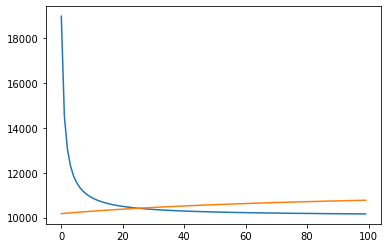

In [55]:
#using matplorlib to draw train againt test data
epochs = []
for i in range(0, 100):
    epochs.append(i)

plt.plot(epochs, AverageError)
plt.plot(epochs, tAverageError)
# For mini batch